In [65]:
import numpy as np
import os
import math
import copy
import cv2
import random
random.seed(1)


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

In [3]:
print cv2.__version__

3.1.0


In [15]:
img1 = cv2.imread("/Users/shixiangyang/Desktop/wuziqi.jpg.png")

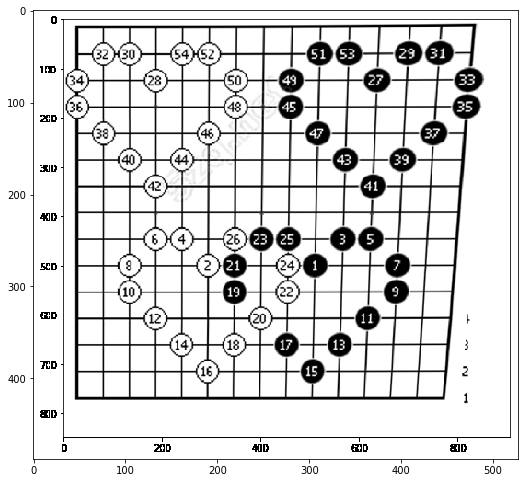

In [16]:
# %%time
fig = plt.figure()
fig.set_size_inches(40,20)
i1 = fig.add_subplot(141)
i1.imshow(img1)


In [30]:

class wuziqi_ana:
    def __init__(self,inputimg = None):
        self.img = cv2.imread(inputimg)
        self.grap = None
        self.edge = None
        self.lines =[]
        
    def preprocess(self):
        '''
        预处理 二值化图像 降噪 模糊 强化边缘
        '''
        img1= copy.deepcopy(self.img)
        gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
        # 灰度图
        self.gray=cv2.GaussianBlur(gray, (5, 5), 0) 
        # 高斯模糊
        self.edge=cv2.Canny(self.gray,60,220)
        # 查找边缘
        ret, binary = cv2.threshold(self.edge,200,255,cv2.THRESH_BINARY) 
        # 二值化
#         binary, contours, hierarchy = cv2.findContours(binary,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)  

        fig = plt.figure()
        fig.set_size_inches(40,20)

        i1 = fig.add_subplot(141)
        i1.imshow(self.gray, "gray")
        i2 = fig.add_subplot(142)
        i2.imshow(self.edge)
#         i3 = fig.add_subplot(143)
#         i3.imshow(binary)
    
    
    def straightLineDetection(self):
        '''
        直线检测 发现其中的行和列
        '''
        img0 = copy.deepcopy(self.img)

        # Convert the img to grayscale
        gray = cv2.cvtColor(img0,cv2.COLOR_BGR2GRAY)

        # Apply edge detection method on the image
        edges = cv2.Canny(gray,20,220,apertureSize = 3)

        # This returns an array of r and theta values
        lines = cv2.HoughLines(edges,1,np.pi/180, 200)
        
        if len(lines)!=0:#(lines)!=None:

            for r,theta in lines[:,0,:]:

                a = np.cos(theta)
                b = np.sin(theta)
                x0 = a*r
                y0 = b*r
                x1 = int(x0 + 1000*(-b))
                y1 = int(y0 + 1000*(a))
                x2 = int(x0 - 1000*(-b))
                y2 = int(y0 - 1000*(a))
                cv2.line(img0,(x1,y1), (x2,y2), (0,0,255),2)

            self.lines = copy.deepcopy(lines[:,0,:])
            plt.imshow(img0);
            
    def straightLineTrim(self):
        '''
        删除多余的直线（很多斜向的直线）
        '''
        raise NotImpletementedError
        
    def trans_form(self):
        '''
        按照检测到图像的斜率 还原成正方形
        '''
        raise NotImpletementedError
    

In [31]:
wuziqi = wuziqi_ana("/Users/shixiangyang/Desktop/wuziqi.jpg.png")

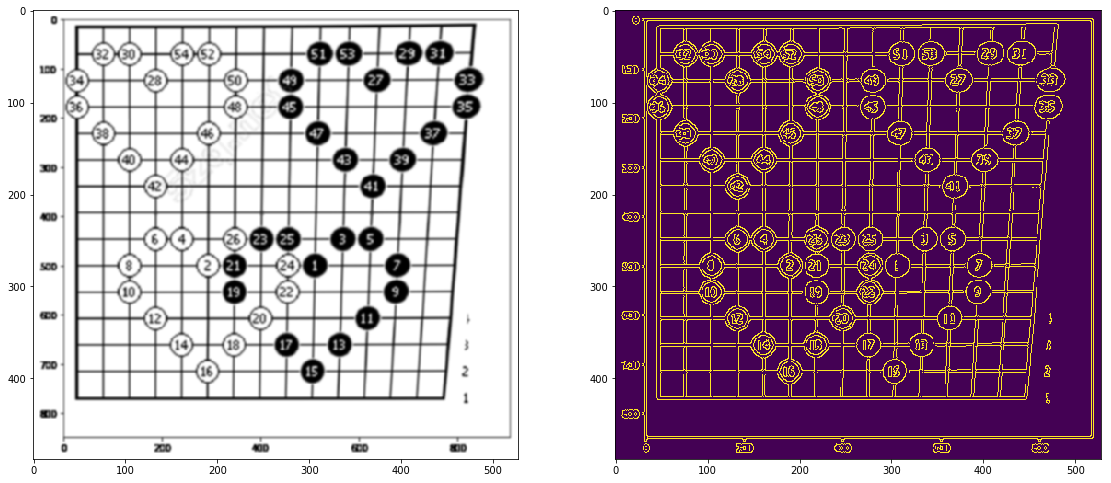

In [32]:
wuziqi.preprocess()

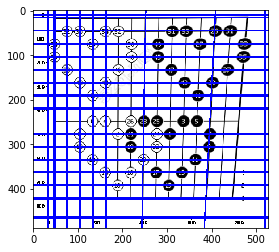

In [33]:
wuziqi.straightLineDetection()

45
[517.0, 519.0, 32.0, 34.0, 45.0, 49.0, 77.0, 75.0, 134.0, 132.0, 103.0, 105.0, 408.0, 252.0, 163.0]
[9.0, 11.0, 463.0, 465.0, 221.0, 423.0, 420.0, 106.0, 190.0, 391.0, 192.0, 393.0, 219.0, 104.0, 135.0, 362.0, 307.0, 305.0, 364.0, 133.0, 16.0, 77.0, 336.0, 75.0, 276.0, 278.0, 164.0, 46.0, 162.0, 334.0]
9.0 465.0
32.0 519.0


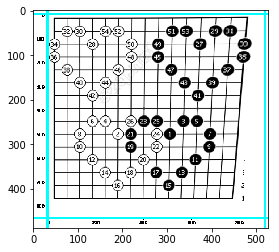

In [69]:
l = wuziqi.lines
length = len(l)
print length
endurance = 0.3
horizon = [ r for r,theta in l if theta<endurance or theta>3.14*2-endurance ]#*np.cos(theta)
erect = [ r for r,theta in l if -endurance<theta-3.14/2<endurance ]
print horizon
print erect
xmin,xmax = min(horizon),max(horizon)
ymin,ymax = min(erect),max(erect)
print ymin,ymax
print xmin,xmax
img0 = copy.deepcopy(img1)

cv2.line(img0,(xmin,0), (xmin,1000), (0,255,255),3)
cv2.line(img0,(xmax,0), (xmax,1000), (0,255,255),3)
cv2.line(img0,(0,ymin), (1000,ymin), (0,255,255),3)
cv2.line(img0,(0,ymax), (1000,ymax), (0,255,255),3)
plt.imshow(img0);